In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import json
import matplotlib.pylab as plt
%matplotlib inline
from scipy import optimize # Usefull to access the docs

from tyssue.core.sheet import Sheet



import tyssue.geometry.sheet_geometry as geom
import tyssue.dynamics.sheet_vertex_model as model
import tyssue.solvers.sheet_vertex_solver as solver

from tyssue.dynamics.sheet_isotropic_model import isotropic_relax



from tyssue.draw.mpl_draw import sheet_view
import tyssue.draw.mpl_draw as draw
from tyssue.io import hdf5

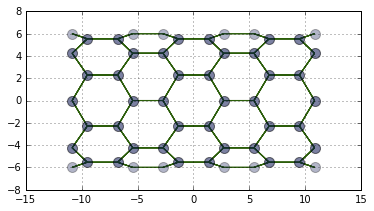

In [4]:
h5store = 'small_hexagonal.hf5'
datasets = hdf5.load_datasets(h5store, data_names=['face', 'jv', 'je'])
sheet = Sheet('emin', datasets)

sheet.set_geom(geom)
geom.update_all(sheet)

mod_specs, dim_mod_specs = sheet.set_model(model)
sheet.grad_norm_factor = dim_mod_specs['settings']['grad_norm_factor']
sheet.nrj_norm_factor = dim_mod_specs['settings']['nrj_norm_factor']

solver_settings = {
    'minimize': {
        'options': {'disp':True,
        'gtol':1e-4},
        'jac': solver.opt_grad
        }
    }


isotropic_relax(sheet, **mod_specs)

live_je = sheet.upcast_face(sheet.face_df.is_alive).astype(np.bool)
dead_je = np.logical_not(live_je)
inactive_jvs = set(sheet.je_df[dead_je].srce)

active_jvs = set(sheet.jv_df.index).difference(inactive_jvs)
active_jvs = list(active_jvs)
sheet.jv_df.is_active = 0
sheet.jv_df.loc[active_jvs, 'is_active'] = 1

fig, ax = sheet_view(sheet, ['z', 'x'])

True


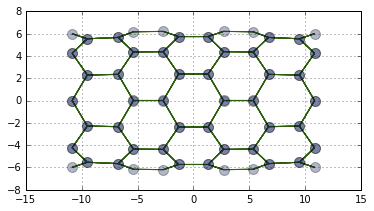

In [6]:
res = solver.find_energy_min(sheet, geom, model, pos_idx=active_jvs, 
                             **solver_settings)
print(res['success'])
fig, ax = sheet_view(sheet, ['z', 'x'])

In [7]:
from tyssue.topology.sheet_topology import type1_transition

![Type 1 transition](../../doc/illus/t1_transition.png)

In [8]:
type1_transition(sheet, 84)
geom.update_all(sheet)


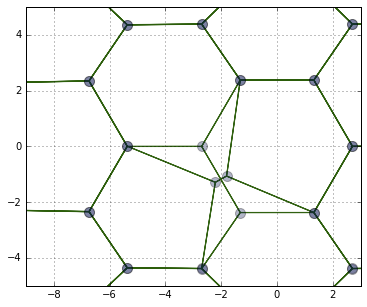

In [14]:

fig, ax = sheet_view(sheet, ['z', 'x'])

ax.set_ylim(-5, 5)
ax.set_xlim(-9, 3)

ax.set_aspect('equal')
fig.set_size_inches(8, 5)


In [9]:
%pdb

Automatic pdb calling has been turned OFF


True


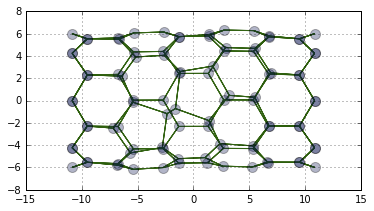

In [15]:
settings = {
    'minimize': {
        'options': {'disp':True,
        'gtol':1e-6},
        'jac': solver.opt_grad
        }
    }


res = solver.find_energy_min(sheet, geom, model, **settings)
print(res['success'])
fig, ax = sheet_view(sheet, ['z', 'x'])

In [17]:
apoptotic_cell = 45

In [30]:
mod_spec, dim_mod_spec = sheet.set_model(model)

In [40]:
dim_mod_spec

{'face': {'contractility': (96.0, float),
  'prefered_area': (24.0, float),
  'prefered_height': (10.0, float),
  'prefered_vol': (240.0, float),
  'vol_elasticity': (1.0, float)},
 'je': {'line_tension': (1410.9060918431107, float)},
 'jv': {'radial_tension': (0.0, float)},
 'settings': {'grad_norm_factor': 11757.550765359256,
  'nrj_norm_factor': 57600.0}}

In [43]:
np.logspace(0, -9, 10, base=2)

array([ 1.        ,  0.5       ,  0.25      ,  0.125     ,  0.0625    ,
        0.03125   ,  0.015625  ,  0.0078125 ,  0.00390625,  0.00195312])

In [39]:
n_steps = 10

pref_vols = np.logspace(0, -9, n_steps, base=2) * dim_mod_spec['face']['prefered_vol'][0]
rad_tensions = np.linspace(0, 1, n_steps) * dim_mod_spec['jv']['radial_tension'][0]

In [15]:
for n, (pref_v, rad_tension) in enumerate(pref_vols, rad_tensions):
    sheet.face_df.loc[apoptotic_cell, 'prefered_vol'] = pref_v
    res = solver.find_energy_min(sheet, geom, model, **settings)
    fig, ax = sheet_view(sheet, ['z', 'x'])
    plt.savefig('test_apopto_{:.3f}.png'.format(pref_v))
    plt.close()

NameError: name 'pref_vols' is not defined

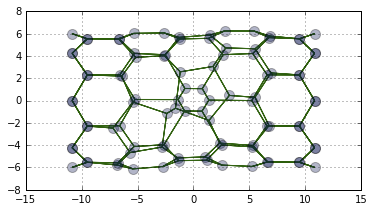

In [37]:
fig, ax = sheet_view(sheet, ['z', 'x'])